<a href="https://colab.research.google.com/github/Devarshi25/Daily-Coding-with-Python/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow

In [2]:
from __future__ import print_function
import pandas as pd
pd.__version__

'1.1.5'

In [3]:
import os
os.getcwd()

'/content'

In [4]:
#Mouting the drive to load a simple dataset stored on the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#Loading a dataset into a dataframe
#Use describe(), info(), head() functions to get simple statistics and a description of the dataset 
iris_dataset_dataframe = pd.read_csv("/content/gdrive/My Drive/Machine Learning/iris.data", sep = ',')
print('Dataset Loaded...')
#iris_dataset_dataframe.describe()
#Use iris 
#iris_dataset_dataframe.iloc[0:3]


Dataset Loaded...


In [21]:
#Use iloc to acces each row, index starts at 0 
iris_dataset_dataframe.iloc[0:4]

,f1,f2,f3,f4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ac006f1d0>,
      dtype=object)

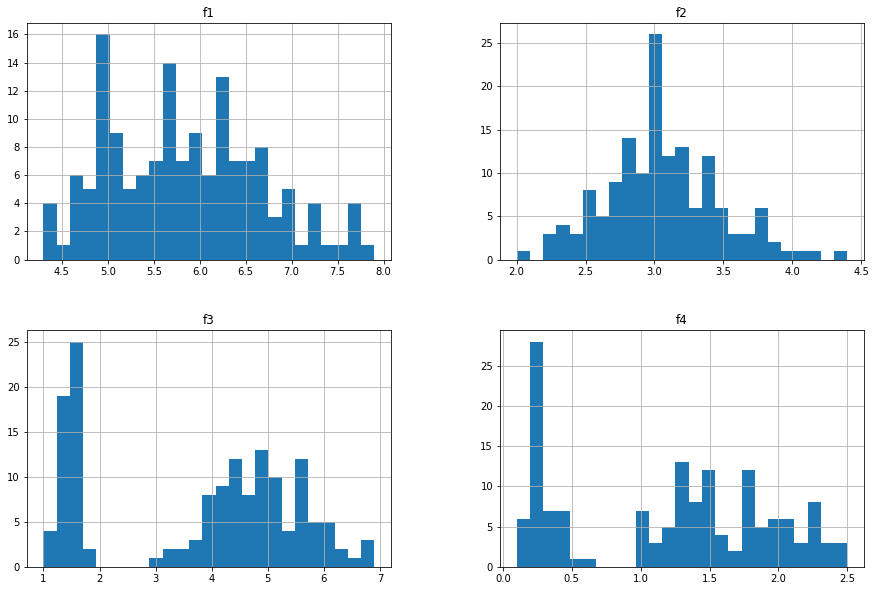

In [8]:
#Plot per feature histogram. figsize = (width, height)
iris_dataset_dataframe.hist(bins=25,figsize=(15,10))

In [9]:
import numpy as np

In [10]:
#Define a function to create a training and test set.
#Takes dataframe and split ratio as input and outputs train and test datasets (dataframes)
def split_train_test(data,test_ratio):
  np.random.seed(42) # fix the seed if you want to generate the same
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#You can also use Scikit-Learn to create a training and test set.
#random_state parameter fixes the seed.
iris_training_set, iris_test_set = train_test_split(iris_dataset_dataframe, test_size=0.2,random_state=42)
#iris_dataset_dataframe.keys()
#iris_test_set.head()

iris_training_data, iris_training_target = iris_training_set[["f1","f2","f3","f4"]], iris_training_set["class"]
iris_test_data, iris_test_target = iris_test_set[["f1","f2","f3","f4"]], iris_test_set["class"]

#iris_training_data.head()


In [13]:
#Create training and test datasets for Iris data
iris_training_set, iris_test_set = split_train_test(iris_dataset_dataframe, 0.2)
iris_test_set.head()
iris_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 73 to 30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      30 non-null     float64
 1   f2      30 non-null     float64
 2   f3      30 non-null     float64
 3   f4      30 non-null     float64
 4   class   30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


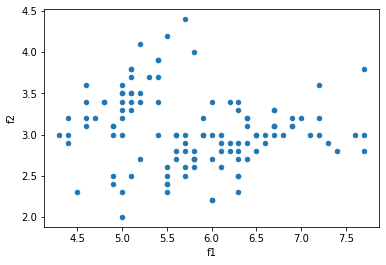

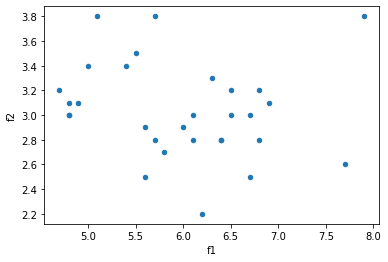

In [14]:
#Scatter plot of training and test data
iris_training_set.plot(kind="scatter", x = "f1", y = "f2")
iris_test_set.plot(kind="scatter", x = "f1", y = "f2")


[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(77.26153846153846, 170.84571428571428, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 108.72, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\nentropy = 0.918\nsamples 

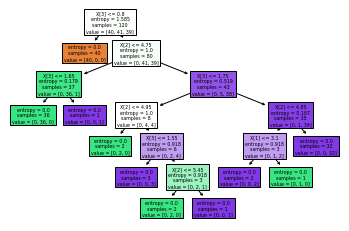

In [19]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# clf = CategoricalNB()
clf = RandomForestClassifier()
clf = DecisionTreeClassifier(criterion = "entropy")
tree.plot_tree(clf.fit(iris_training_data,iris_training_target),filled = "true")

In [20]:
iris_test_target_predict=clf.predict(iris_test_data)
confusion_matrix(iris_test_target,iris_test_target_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])